In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
Data=pd.read_csv('data/social_network_data.csv')
Data[['Gender1','Gender2']]=pd.get_dummies(Data['Gender'])
Data['Bias']=np.random.normal(size=Data.shape[0])
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender1,Gender2,Bias
0,15624510,Male,19.0,19000.0,0,0,1,-0.436783
1,15810944,Male,35.0,20000.0,0,0,1,1.357338
2,15668575,Female,26.0,43000.0,0,1,0,-0.976606
3,15603246,Female,27.0,57000.0,0,1,0,1.469387
4,15804002,Male,19.0,76000.0,0,0,1,0.901518


In [3]:
Xdata=Data[['Age','EstimatedSalary','Gender1','Gender2','Bias']]

In [4]:
Xdata[['Age','EstimatedSalary','Gender1','Gender2']]=(Xdata[['Age','EstimatedSalary','Gender1','Gender2']]-Xdata[['Age','EstimatedSalary','Gender1','Gender2']].mean(axis=0))/Xdata[['Age','EstimatedSalary','Gender1','Gender2']].var(axis=0)

C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [5]:
Ydata=Data[['Purchased']]

In [6]:
x_train, x_test, y_train, y_test=train_test_split(Xdata, Ydata, test_size=0.2)


In [7]:
#scale=StandardScaler()
#x_train=scale.fit_transform(x_train)
#x_test=scale.transform(x_test)



In [8]:
def prob(X,W):
    return np.exp(X@W)/(1+np.exp(X@W))

In [9]:
def logL(X,W,Y):
    return -np.sum(-np.log(1+np.exp(X@W))+np.multiply(Y,X@W))
    

In [10]:
def der1(X,p,Y):
    return -X.T@(Y-p)

In [12]:
def Hes(X,p,k):
    H=np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            H[i,j]=np.sum(p*(1-p)*X[:,i]*X[:,j])+0.0000001
    return H        

In [13]:
max_iteration=5000
LogL=[]
X=x_train.as_matrix()
Y=y_train.as_matrix()
k=x_train.shape[1]
W=np.random.rand(k,1)
print(x_train.shape, y_train.shape, W.shape)

(320, 5) (320, 1) (5, 1)


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


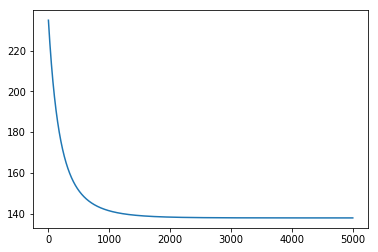

In [14]:
for i in range(max_iteration):
    p=prob(X,W)
    LogL.append(logL(X,W,Y))
    dW=der1(X,p,Y)
    H=Hes(X,p,k)
    W=W-np.linalg.inv(H)@dW
    
    
plt.plot(LogL)     

In [15]:
W

array([[ 2.03581227e+01],
       [ 3.49308459e+04],
       [-1.74746244e+04],
       [-1.74746122e+04],
       [-9.33129384e-02]])

In [539]:
X_test=x_train.as_matrix()
Y_test=y_train.as_matrix()

probability=prob(X_test, W)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [540]:
m=probability.shape[0]

In [541]:
for i in range(m):
    if probability[i,0]>=0.5:
        probability[i,0]=1
    else:
        probability[i,0]=0
            

In [542]:
Y_pred=probability

In [543]:
cm = confusion_matrix(Y_test, Y_pred)

In [544]:
print(cm)

[[155  52]
 [  6 107]]


In [519]:
from sklearn.linear_model import LogisticRegression

In [520]:
classifier=LogisticRegression()

In [521]:
classifier.fit(X, Y)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [522]:
y_preb=classifier.predict(X_test)

In [523]:
cm2=confusion_matrix(Y_test, y_preb)

In [524]:
print(cm2)

[[204   4]
 [ 71  41]]
